**Matt Bass**

Spring 2021

CS 251: Data Analysis and Visualization

Project 2: Matrix Transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import palettable
from data import *
import transformation

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20, 'figure.figsize': (4, 4)})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 2: Matrix Transformations

The goal of this project is to give you practice using matrix multiplication to efficiently transform data (translation, scaling, and rotation). To that end, you'll develop the Transformation class as a child class of Analysis, from Project 1. 

We expect you to create the transformation matrices and and apply them from data using matrix multiplication yourself — **you may not call high-level functions to do all the work for you**. Functions similar to the following are fine to use:

- creating an identity matrix with `np.eye()`
- creating matrices of zeros or ones with `np.zeros()` or `np.ones()`
- concatenating matrices with `np.hstack()` or `np.vstack()`

Here is an **overview** of Transformation class's methods in transformation.py (use tasks below to guide you through the implementation):
1. `__init__()`: The constructor.
1. `get_data_homogeneous()`: Adds a column of normal homogeneous coordinates to the data matrix.
2. `project()`: Projects the M-dimensional Data object in self.data onto a subset of its axes.
3. Construct homogeneous transformation matrices (in any order):
> * `translation_matrix()`: Constructs an M+1-by-M+1 translation matrix for shifting the M-dimensional Data object in self.data
> * `scale_matrix()`: Constructs an M+1-by-M+1 scale matrix for resizing the M-dimensional Data object in self.data
> * `rotation_matrix_3d()`: Constructs a 4x4 rotation matrix for rotating the 3-dimensional Data object in self.data
4. Apply transformation matrices to the Data object in self.data (with homogeneous coordinates):
> * `translate()`: Uses a translation matrix to transform self.data
> * `scale()`: Uses a scale matrix to transform self.data
> * `rotate_3d()`: Uses a 3D rotation matrix to transform self.data (which must, in this case, contain exactly 3 features, plus the normal homogeneous coordinate)
> * `transform()`: Uses a homogeneous transformation matrix (passed as a parameter) to transform self.data.
5. Normalization:
> * `normalize_together()`: Uses homogeneous transformation matrices to normalize all the features of self.data together, using the global min and max.
> * `normalize_separately()`: Uses homogeneous transformation matrices to normalize each feaure separately, using its own local min and max.
6. Visualization:
> * `scatter_color()`: Similar to Analysis.scatter(), but using a third feature to control the color of the plotted data points.
> * `heatmap()`: This function is provided for you, already completed. Take a look to see what it's doing.

Use this notebook to demo your completed Transformation class (transformation.py).

## Task 0) Preprocess Iris data

- Copy over `data.py`, `analysis.py`, and `iris.csv` from Project 1.
- In whatever way you wish, replace the `species` strings with ints — i.e. setosa -> 0, versicolor -> 1, virginica -> 2. *Remember to change the type to numeric!*

## Task 1) Implement transformation matrices

Implement the following methods in `transformation.py`, running the following test code to guide you as you work. 
- Constructor
- `project(headers)`: "project" the data on the list of data variables specified by `headers` — i.e. select a subset of the variables from the original dataset.
- `get_data_homogeneous`: Helper method to get a version of the projected data array with an added homogeneous coordinate.
- `translation_matrix(magnitudes)`: Make an M-dimensional homogeneous transformation matrix for translation
- `scale_matrix(magnitudes)`: Make an M-dimensional homogeneous scaling matrix for scaling.

### Test (i): Translation

Write test code in the cell below that does the following. Note the below expected output.

* Create Data and Transformation objects for the Iris dataset. 
* Project the Transformation object's data onto the first 3 axes (`sepal_length`, `sepal_width`, and `petal_length`).
* Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +1.5 along `petal_length`, then print the translation matrix. 

In [2]:
# Your test code here
iris_data = Data('iris.csv')
iris_transform = transformation.Transformation(iris_data)
iris_transform.project(['sepal_length','sepal_width', 'petal_length'])
iris_translation = iris_transform.translation_matrix([-0.5,0,1.5])
print(iris_translation)

[[ 1.   0.   0.  -0.5]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.   1.5]
 [ 0.   0.   0.   1. ]]


**Your output should look like:**

    Translation matrix:
    [[ 1.   0.   0.  -0.5]
     [ 0.   1.   0.   0. ]
     [ 0.   0.   1.   1.5]
     [ 0.   0.   0.   1. ]]

### Test (ii): Scaling

* Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`, then print the scaling matrix.

In [3]:
iris_scale = iris_transform.scale_matrix([1,2,(1/3)])
print(iris_scale)# Your test code here

[[1.      0.      0.      0.     ]
 [0.      2.      0.      0.     ]
 [0.      0.      0.33333 0.     ]
 [0.      0.      0.      1.     ]]


**Your output should look like:**

    Scale matrix:
    [[1.      0.      0.      0.     ]
     [0.      2.      0.      0.     ]
     [0.      0.      0.33333 0.     ]
     [0.      0.      0.      1.     ]]

## Task 2) Transformation Detective

The objective of this task is to determine the set of matrix transformations to apply to the specified data and what variables to project onto in order to reproduce the below plots.

### 2a) Hello, Iris

- Create Data and Transformation objects for the Iris dataset.
- Project the dataset onto all the headers.
- Use the Transfromation object to generate a pair plot of the entire Iris dataset. (*Your results should look just like the example, below.*)

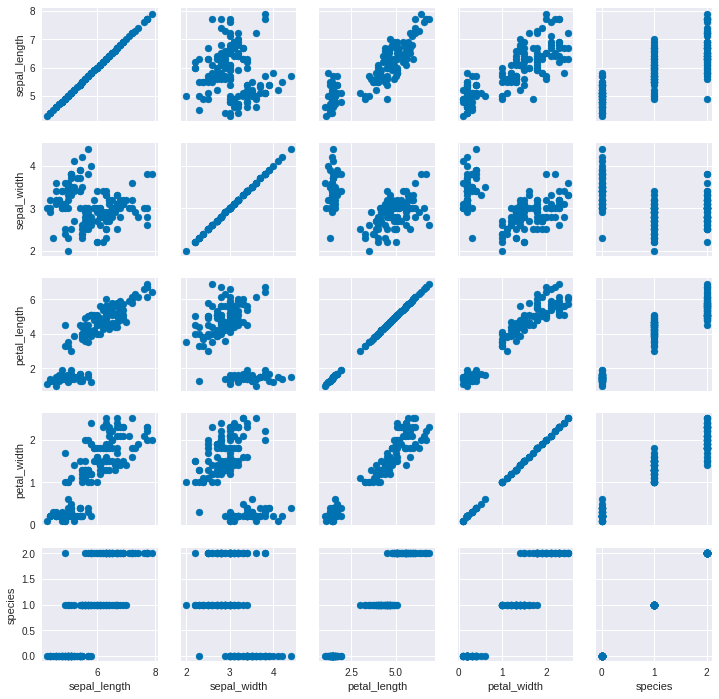

In [4]:
iris_data = Data('iris.csv')
iris_transform = transformation.Transformation(iris_data)
iris_transform.project(iris_data.get_headers())
iris_transform.pair_plot(iris_data.get_headers())
iris_transform.show()

#### Your results should look like the image below.

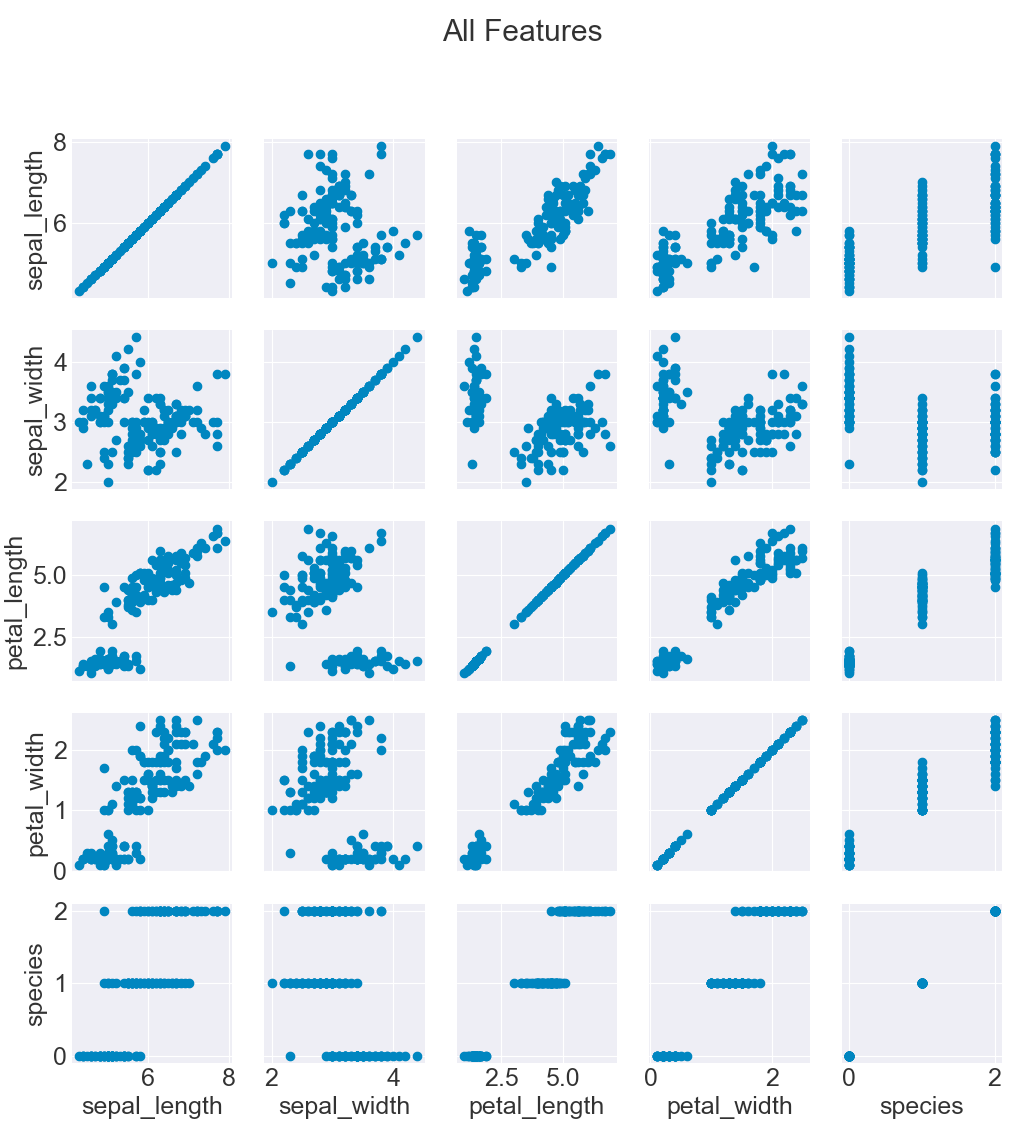

**Question 1:** How many dimensions (features) does the Iris dataset contain?

**Answer 1:**  5 

### 2b) Solve transformation mystery 1

- Make a Transformation object.
- Determine the set of variables to project onto to recreate the image below.
- Create a pair plot identical to the one below based on the projected data.

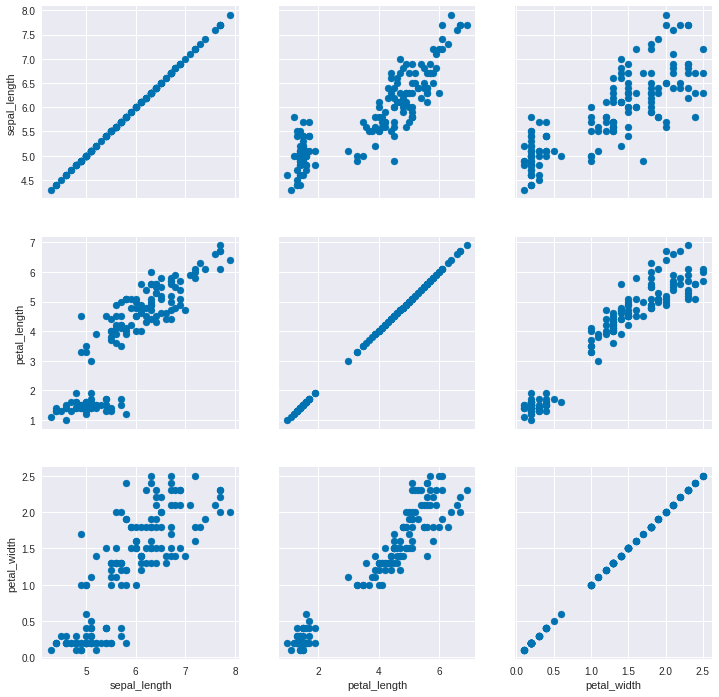

In [5]:
iris_transform.project(['sepal_length', 'petal_length', 'petal_width'])
iris_transform.pair_plot(['sepal_length', 'petal_length', 'petal_width'])
iris_transform.show()

#### Your results should look like the image below.

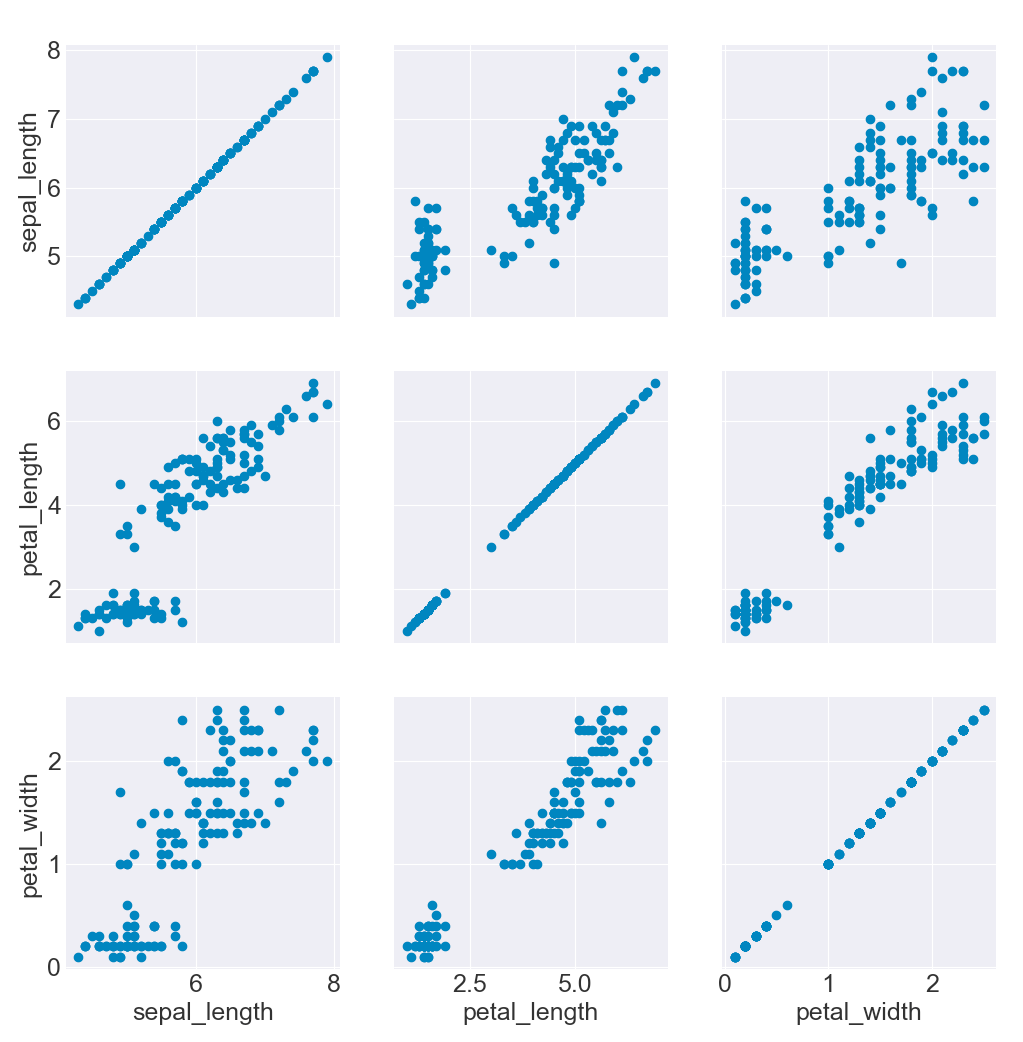

**Question 2:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 2:** By looking at the data it looks like no transfermations were made

### 2c) Implement methods that apply a single transformation

It can be convenient to have dedicated methods to apply a single transformation to projected data (without having to pass around matrices). Implement the following methods for this purpose:
- `translate`: Translates the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.
- `scale`: Scales the variables `headers` in projected dataset in corresponding amounts specified by `magnitudes`.

#### Test `translate`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Translate x, y, and z by +1 unit each.
- Print out the 1st 5 samples of the result.

In [6]:
iris_transform = transformation.Transformation(iris_data)
iris_transform.project(['sepal_length', 'sepal_width', 'petal_length'])
translate_iris = iris_transform.translate([1, 1, 1])
print(translate_iris[:5])

[[6.1 4.5 2.4]
 [5.9 4.  2.4]
 [5.7 4.2 2.3]
 [5.6 4.1 2.5]
 [6.  4.6 2.4]]


**Your translated output should look like:**

    [[6.1 4.5 2.4]
     [5.9 4.  2.4]
     [5.7 4.2 2.3]
     [5.6 4.1 2.5]
     [6.  4.6 2.4]]

#### Test `scale`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Scale x, y, and z to 50% each.
- Print out the 1st 5 samples of the result.

In [7]:
iris_transform = transformation.Transformation(iris_data)
iris_transform.project(['sepal_length', 'sepal_width', 'petal_length'])
scale_iris = iris_transform.scale([0.5, 0.5, 0.5])
print(scale_iris[:5])

[[2.55 1.75 0.7 ]
 [2.45 1.5  0.7 ]
 [2.35 1.6  0.65]
 [2.3  1.55 0.75]
 [2.5  1.8  0.7 ]]


**Your scale output should look like:**

    [[2.55 1.75 0.7 ]
     [2.45 1.5  0.7 ]
     [2.35 1.6  0.65]
     [2.3  1.55 0.75]
     [2.5  1.8  0.7 ]]

### 2d) Solve transformation mystery 2

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data.

**NOTE:** Remember that `Transformation` inherits from `Analysis` so you have access to all those methods.

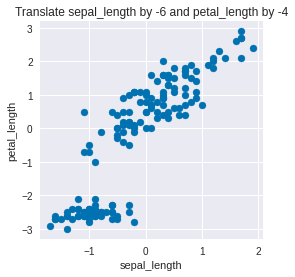

In [8]:

iris_transform = transformation.Transformation(iris_data)
iris_transform.project(['sepal_length', 'petal_length'])


iris_transform.translate([-6, -4])
iris_transform.scatter('sepal_length','petal_length', title = f'Translate sepal_length by -6 and petal_length by -4')
iris_transform.show()

#### Your results should look like the image below.

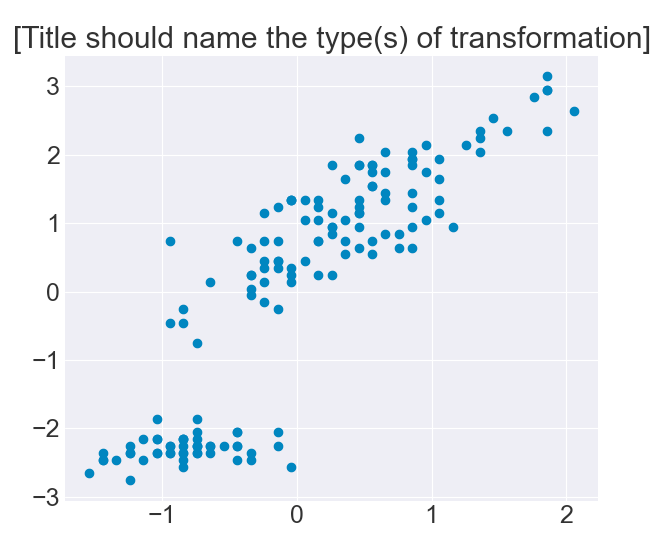

**Question 3:** How could you tell what type(s) of transformation to perform in order to recreate this figure?

**Answer 3:** looked at the pair plot then found the graph that looked similar then compared its axis to the one above

### 2e) Solve transformation mystery 3

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto then create/apply transformation matrix (or matrices) to recreate the image below.
- Create a scatter plot identical to the one below based on the projected/transformed data. 

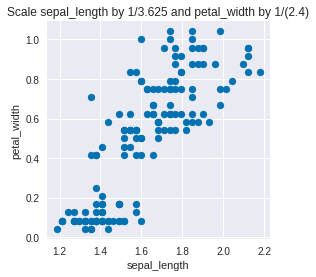

In [9]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (4,4)})
iris_transform = transformation.Transformation(iris_data)
iris_transform.project(['sepal_length', 'petal_width'])

iris_transform.scale([(1/(3.625)), 1/(2.4)])

iris_transform.scatter('sepal_length','petal_width', title = f'Scale sepal_length by 1/3.625 and petal_width by 1/(2.4)')
iris_transform.show()

#### Your results should look like the plot below.

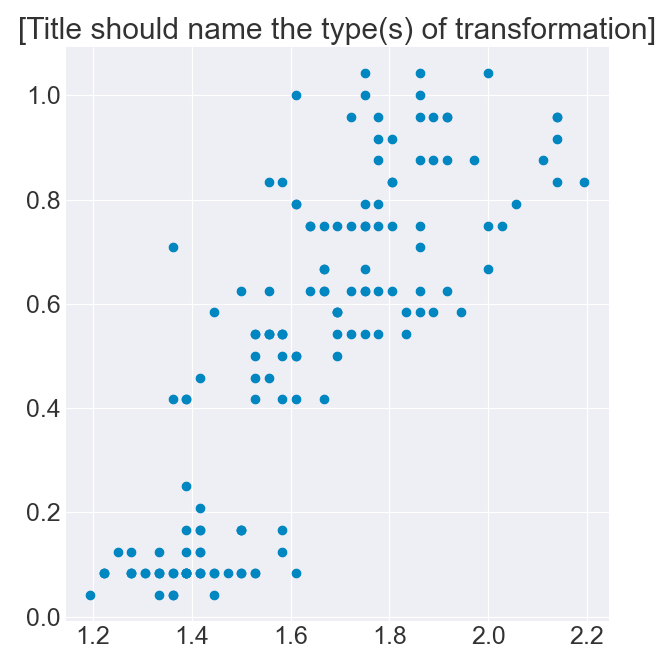

**Question 4:** How could you tell what type(s) of transformation to perform in order to recreate this figure? 

**Answer 4:** Again I looked at pair plot then to find the scaleres i did the math like 5.8/x = 1.6 and solved for x

## Task 3) Normalization

In this task, you will take advantage of your data transformation pipeline to normalize data in two ways:

1. All the variables together (entire matrix).
2. All the variables separately/independently.

### 3a) Applying compound transformations

Performing data normalization requires a sequence of matrix transformations. In cases like these, it can be convienent to create one compound transformation matrix `C` then multiply it once with the data matrix (instead of doing separate matrix multiplications for each transformation).

Before you start working on the normalization methods, implement the helper method `transform(C)` to transform the PROJECTED dataset by applying the homogeneous transformation matrix `C`.

#### Test `transform`: Perform the compound translation-scaling transformation to the projected data

* Create a Transformation object for the Iris dataset then project onto the first 3 variables: `sepal_length`, `sepal_width`, and `petal_length`.
* Create **and print** a compound transformation matrix `C` in the cell below from translation and scaling matrices that perform the following operations. Remember that order matters when building your compound transformation matrix and the data matrix will ultimately go on the right-hand side.
    - Create a translation matrix that would shift the projected data by -0.5 along `sepal_length` and +1.5 along `petal_length`. 
    - Create a scaling matrix that would scale the projected data by 2 along `sepal_width` and 1/3 along `petal_length`.
- Use the `transform` method to apply it to the projected data. **Print the 1st 5 samples.**

In [10]:
iris_transform = transformation.Transformation(iris_data)
iris_transform.project(['sepal_length', 'sepal_width', 'petal_length'])
C = iris_transform.scale_matrix([1,2,(1/3)])

translate_part = iris_transform.translation_matrix([-0.5,0,0.5])
C[:,3] = translate_part[:,3]


transformed_data = iris_transform.transform(C)



print(f'\nCompound transformation matrix:\n{C}\nTransformed data:\n{transformed_data[:5]}')


Compound transformation matrix:
[[ 1.       0.       0.      -0.5    ]
 [ 0.       2.       0.       0.     ]
 [ 0.       0.       0.33333  0.5    ]
 [ 0.       0.       0.       1.     ]]
Transformed data:
[[4.6     7.      0.96667]
 [4.4     6.      0.96667]
 [4.2     6.4     0.93333]
 [4.1     6.2     1.     ]
 [4.5     7.2     0.96667]]


**Your output should look like:**


    Compound transformation matrix:
    [[ 1.       0.       0.      -0.5    ]
     [ 0.       2.       0.       0.     ]
     [ 0.       0.       0.33333  0.5    ]
     [ 0.       0.       0.       1.     ]]

    Transformed data:
    [[4.6     7.      0.96667]
     [4.4     6.      0.96667]
     [4.2     6.4     0.93333]
     [4.1     6.2     1.     ]
     [4.5     7.2     0.96667]]

### 3b) Normalize together

Implement `normalize_together` then test it below by following below steps:

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __together__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

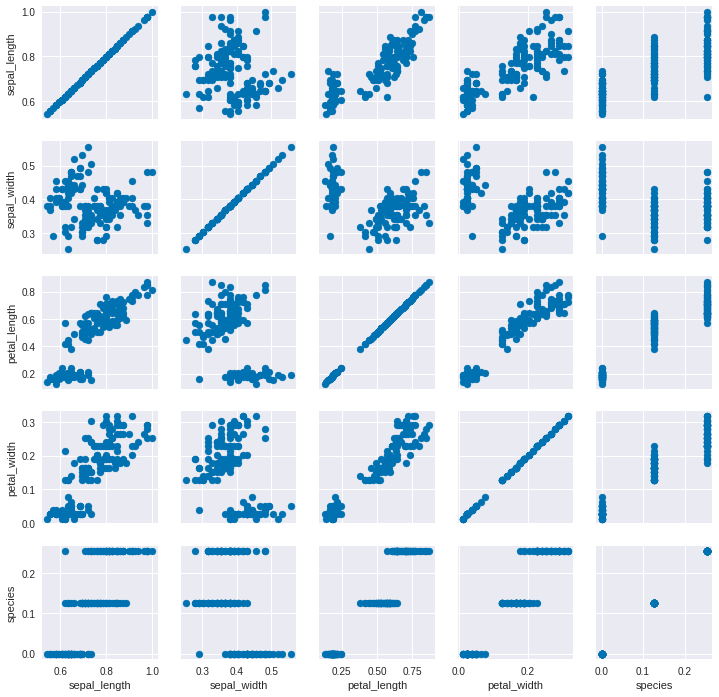

In [11]:
iris_transform = transformation.Transformation(iris_data)
iris_transform.normalize_together()
iris_transform.pair_plot(iris_data.get_headers())
iris_transform.show()

#### Your results should look like the image below.

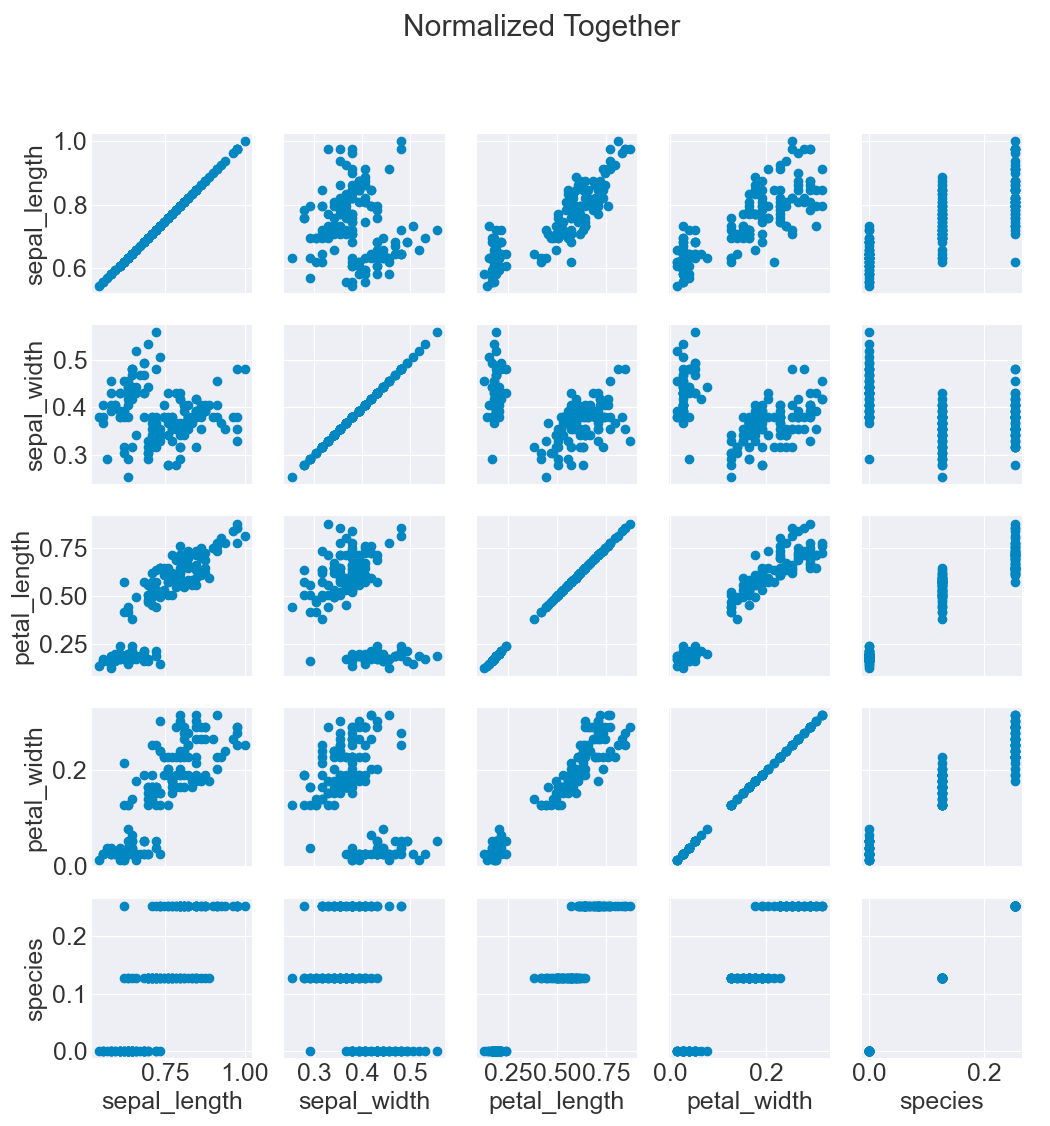

### 3c) Normalize Separately

Implement `normalize_separately` then test it below by following below steps:

- Make a Transformation object with the Iris data.
- Determine the set of variables to project onto to recreate the image below.
- Use a Transformation object to normalize each feature of the Iris dataset __separately__.
- Create a pair plot identical to the one below based on the projected/transformed data. 

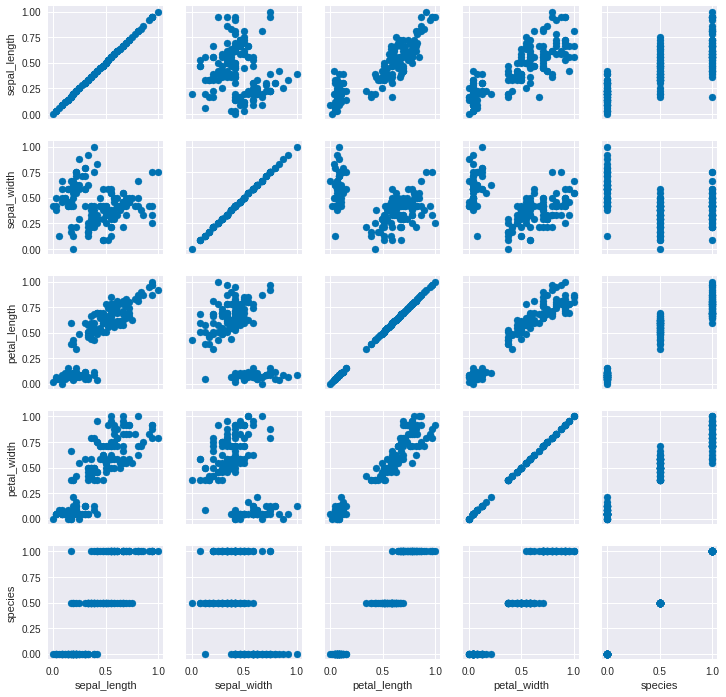

In [12]:
iris_transform = transformation.Transformation(iris_data)
iris_transform.normalize_separately()
iris_transform.pair_plot(iris_data.get_headers())
iris_transform.show()

#### Your results should look like the image below.

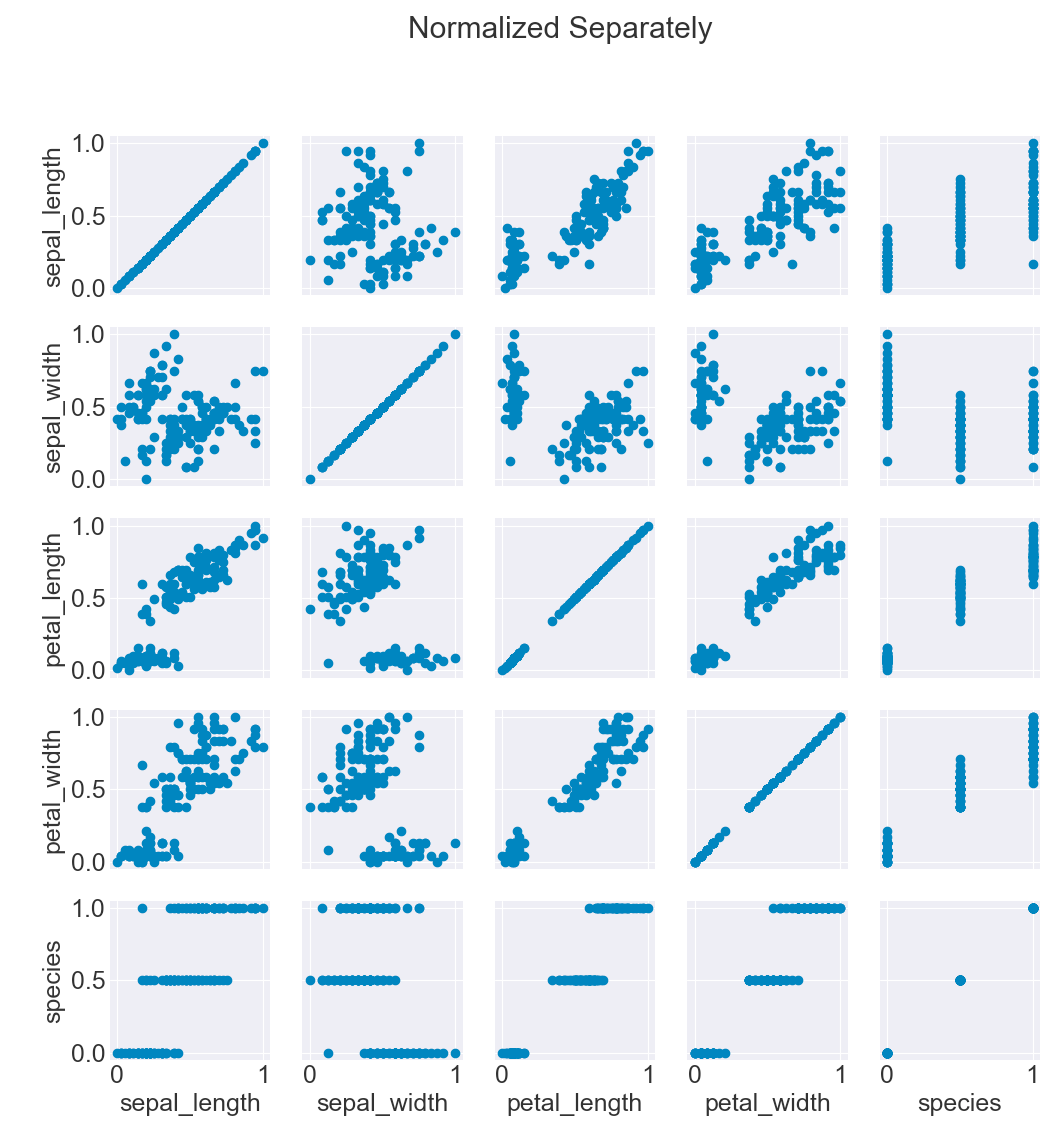

**Question 5:** What type(s) of transformation does normalization require, and in words, what is the meaning of the transformation matrix parameter values used?

**Answer 5:**

It puts the data in a scale of 0 to 1 together puts all the data relative to all the data and
separate puts them relative to themselves (each variable column is normalized form 0 to 1 with a max of 1 and min of 0 for each feature)
Normalizing data together is better when they are all on the same scale (ie all measurements in cm for example) but normalizing separately
is better for when each feature is measured on a different scale / unit

## Task 4) Mystery Letter Dataset

In this task your goal is to find the 3 capital letters hidden in a dataset with 3 variables (3D data). You will begin by implementating methods to create rotation matrices and apply rotation. This operation will play an important role in discovering and transforming the data to uncover these letters.

### Task 4a) Rotation matrices

Implement the following methods then fill in the cells below to test your code.

- `rotation_matrix_3d(header, degrees)`: Make an 3-D homogeneous rotation matrix for rotating the projected data about the ONE axis/variable `header`.
- `rotate_3d`: Rotates the projected data about the variable `header` by the angle (in degrees) `degrees`

#### Test (i): `rotation_matrix_3d`

- Make a Transformation object with the Iris data
- Project onto the first 3 variables (`sepal_length`, `sepal_width`, `petal_length`).
- Create a rotatation matrix that would rotate the Transformation object's projected data by 45 degrees about `petal_length`, and print the rotation matrix.

In [13]:
iris_transform = transformation.Transformation(iris_data)
iris_transform.project(['sepal_length', 'sepal_width', 'petal_length'])
rot_mat_3d = iris_transform.rotation_matrix_3d('petal_length', 45)
print(rot_mat_3d)

[[ 0.70711 -0.70711  0.       0.     ]
 [ 0.70711  0.70711  0.       0.     ]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]]


**Your output should look like:**

    Rotation matrix:
    [[ 0.70711 -0.70711  0.       0.     ]
     [ 0.70711  0.70711  0.       0.     ]
     [ 0.       0.       1.       0.     ]
     [ 0.       0.       0.       1.     ]]

#### Test (ii): `rotate_3d`

- Using the same Transformation object created in the previous test, rotate about `sepal_length` 10 deg.
- Print out the 1st 5 samples of the result.

In [14]:
iris_data = Data('iris.csv')
iris_transform = transformation.Transformation(iris_data)
iris_transform.project(['sepal_length', 'sepal_width', 'petal_length'])
rot_3d = iris_transform.rotate_3d('sepal_length', 10)
print(rot_3d[:5])

[[5.1     3.20372 1.9865 ]
 [4.9     2.71132 1.89968]
 [4.7     2.92564 1.83592]
 [4.6     2.79243 2.01552]
 [5.      3.3022  2.00386]]


**Your rotation output should look like:**

    [[5.1     3.20372 1.9865 ]
     [4.9     2.71132 1.89968]
     [4.7     2.92564 1.83592]
     [4.6     2.79243 2.01552]
     [5.      3.3022  2.00386]]

### Task 4b)  Mystery Letter Dataset

Your goal is to find the 3 capital letters hidden in `letter_data.csv` with 3 variables (3D data) and create single scatter plots showing each individual letter plotted right-side up. 
- Create Data and Transformation objects for the Letters dataset (`letter_data.csv`).
- Normalize the data seperately then apply transformations to find the hidden letters (scaling, translating and/or rotation).

**Hints:**
- Remember: Applying transformations changes the data stored in the `Transformation` object (i.e. the effects on the data compound). After searching for and identifying one letter, it might be helpful to start with the original data again. This can be achieved by re-projecting and normalizing.
- Visualize the data using `pair_plot` and/or `scatter` after applying a transformation.
- Downloading and running `scatter3d.py` from Terminal will produce an interactive 3D scatterplot. Feel free to use this tool to explore the data and inform your decisions about which transformations to use.




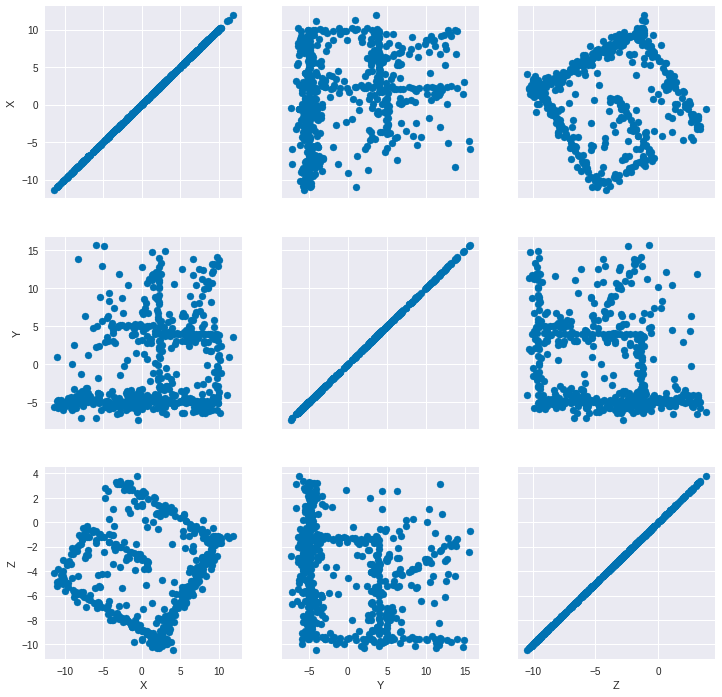

In [15]:
letter_data = Data('letter_data.csv')
letter_transform = transformation.Transformation(letter_data)

letter_transform.pair_plot(letter_data.get_headers())
letter_transform.show()

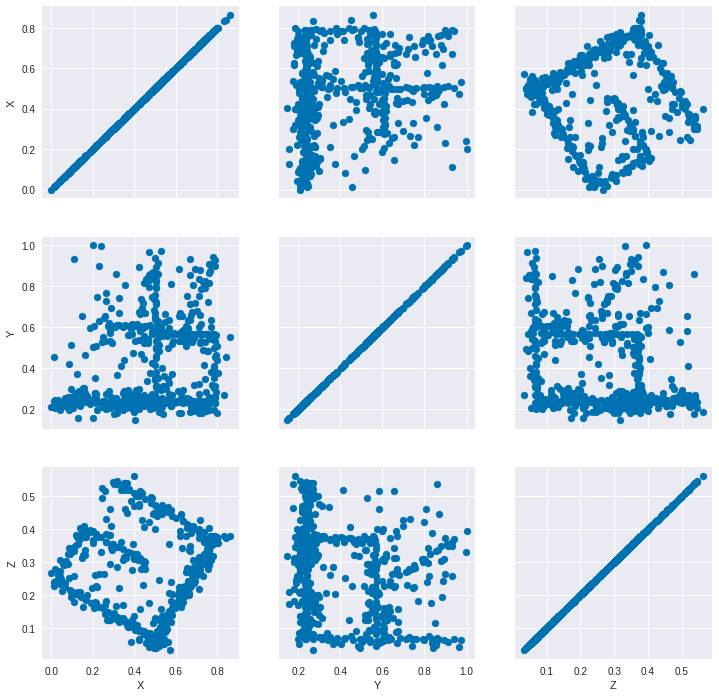

In [16]:
letter_data = Data('letter_data.csv')
letter_transform = transformation.Transformation(letter_data)
lettter_3D_together = letter_transform.normalize_together()
letter_transform.pair_plot(letter_data.get_headers())
letter_transform.show()

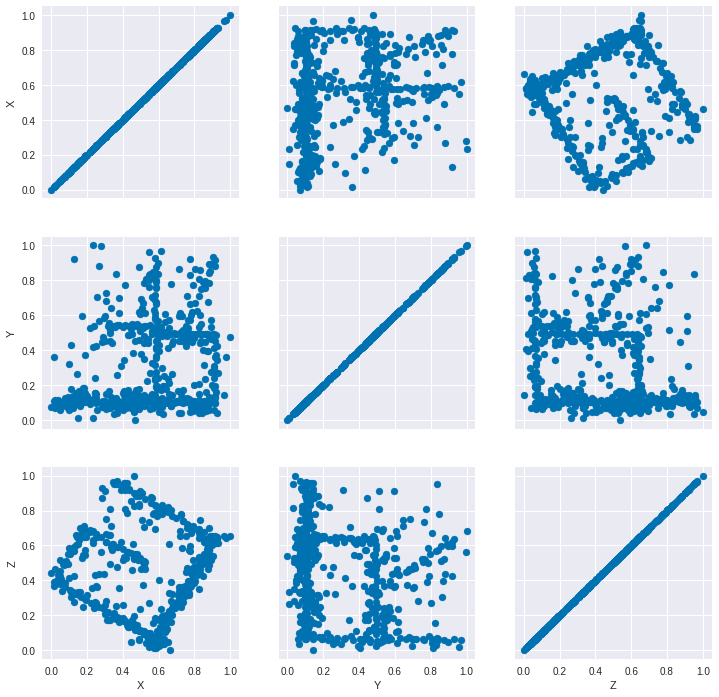

In [17]:
letter_data = Data('letter_data.csv')
letter_transform = transformation.Transformation(letter_data)
lettter_3D_together = letter_transform.normalize_separately()
letter_transform.pair_plot(letter_data.get_headers())
letter_transform.show()


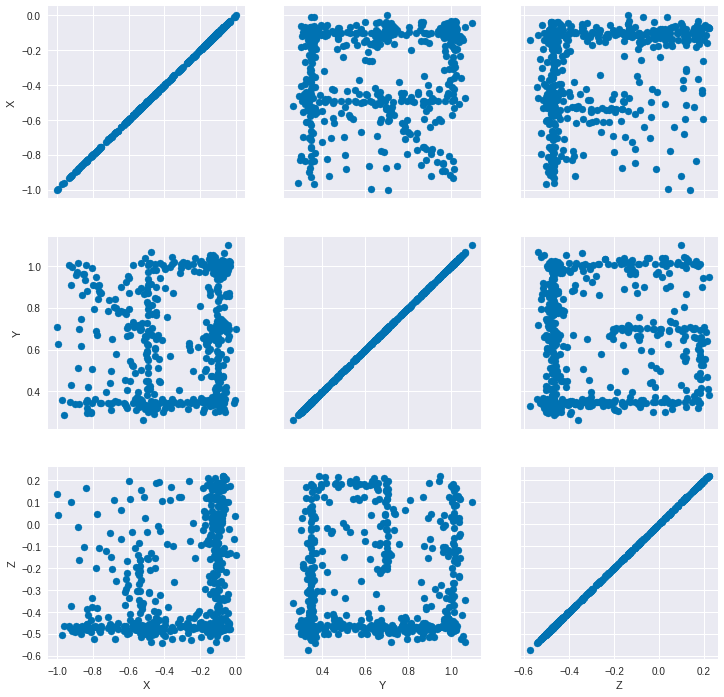

In [18]:
letter_data = Data('letter_data.csv')
letter_transform = transformation.Transformation(letter_data)
letter_3D_together = letter_transform.normalize_separately()

letter_transform.rotate_3d('Y', 60)
letter_transform.rotate_3d('Z', 90)


letter_transform.pair_plot(letter_data.get_headers())
tran_data =  letter_transform.data.get_all_data()



#this is for debugging with scatter3D
np.savetxt("letter_transform.csv", tran_data,  
              delimiter = ",")
with open('letter_transform.csv', mode='w') as letter_file:
    letter_writer = csv.writer(letter_file, delimiter=',')
    letter_writer.writerow(['X', 'Y', 'Z'])
    letter_writer.writerow(['numeric', 'numeric', 'numeric'])
    for row in tran_data:
        letter_writer.writerow(list(row))

    
letter_transform.show()




**Question 6:** Which letters did you find?  How could you tell what type(s) of transformations needed to be performed to find the letters?

**Answer 6:** I just lookeed at the data in scatter3d to see if I could find the letters then I just fiddled aroound with different rotations until I figured it out. ( a lot of trial and error and using the right hand rule) 
The letters I found are F ,G and R.

## Task 5) Visualizing multi-dimensional data (>3D)

The Iris dataset has too many dimensions to visualize in 2D space with a standard scatterplot! Let's see what we can do about that.

### 5a) Color scales

In this subtask, you will use color to visualize a third dimension of the Iris dataset. Your color scale should be colorblind friendly.

- Implement the `scatter_color()` method to your `Transformation` class that uses color to represent a third axis on a 2D scatterplot.
    - Use a ColorBrewer color palette to implement the color scale (e.g. from the `palettable` library).
- Use your `scatter_color()` method to recreate the images below.
    * One with headers [`sepal_length`, `petal_length`, `sepal_width`].
    * Another with headers [`sepal_length`, `petal_length`, `species`].

**Reminder:** Re-project your data onto the appropriate variables before creating each plot.

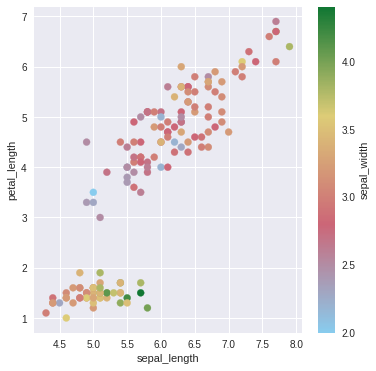

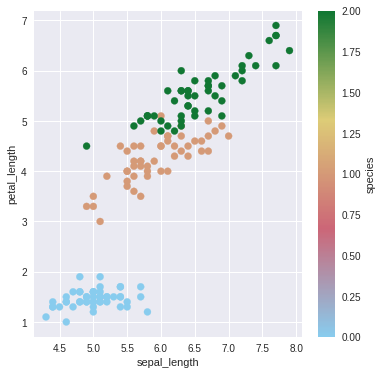

In [19]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (6, 6)})
iris_data = Data('iris.csv')
iris_transform = transformation.Transformation(iris_data)
iris_transform.scatter_color('sepal_length', 'petal_length', 'sepal_width')
iris_transform.show()
iris_transform.scatter_color('sepal_length', 'petal_length', 'species')
iris_transform.show()

#### Your results should look like the following

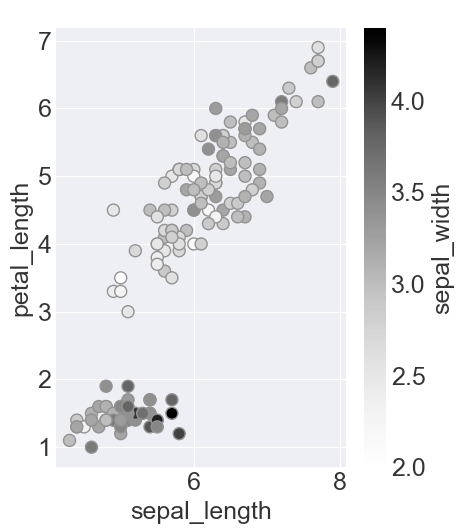

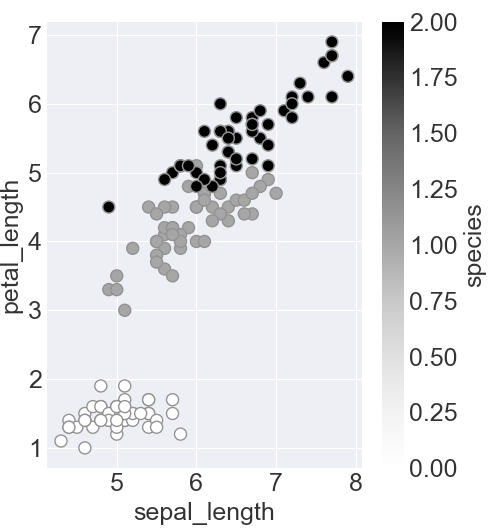

**Question 7:** In a scatterplot, is color a more useful representation of __continuous__ features (like sepal width) or __discrete__ features (like species)? Why do you think that is?

**Answer 7:** It is more usefull for discreate species because every sample will not habe their own color representation so easier to see grouping. For this continuous variable being ploted also the color scale does not make much sense could be used better for a continuous vartiable like temperature going from blue to red as temp increased

### 5b) Heatmap

Use the a `heatmap()` method (written for you) to recreate the image below.

/home/matt3080/PycharmProjects/cs251/project2/transformation.py:448: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_lbls)


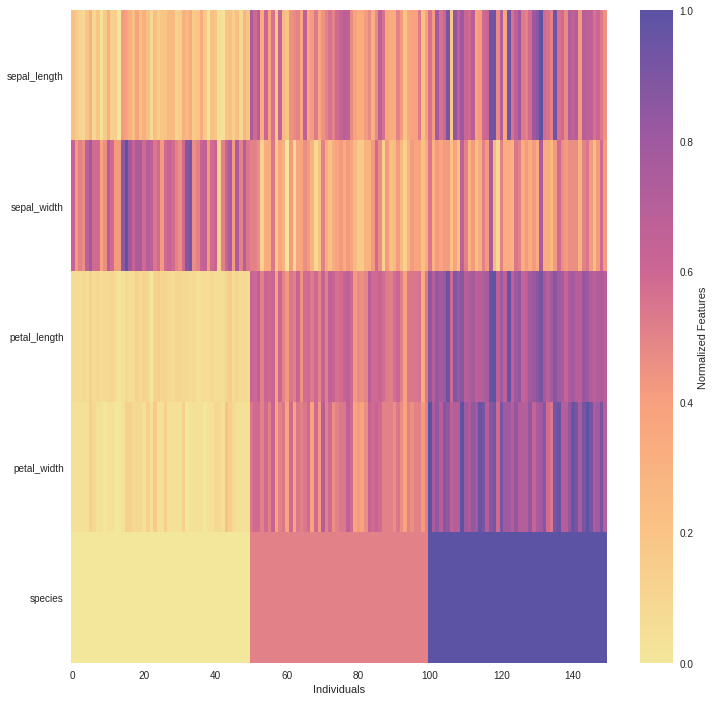

In [20]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (12, 12)})
iris_data = Data('iris.csv')

iris_transform = transformation.Transformation(iris_data)
sunset = palettable.cartocolors.sequential.Sunset_6.mpl_colormap
iris_transform.heatmap(cmap = sunset)
iris_transform.show()

#### Your results should look like the image below.

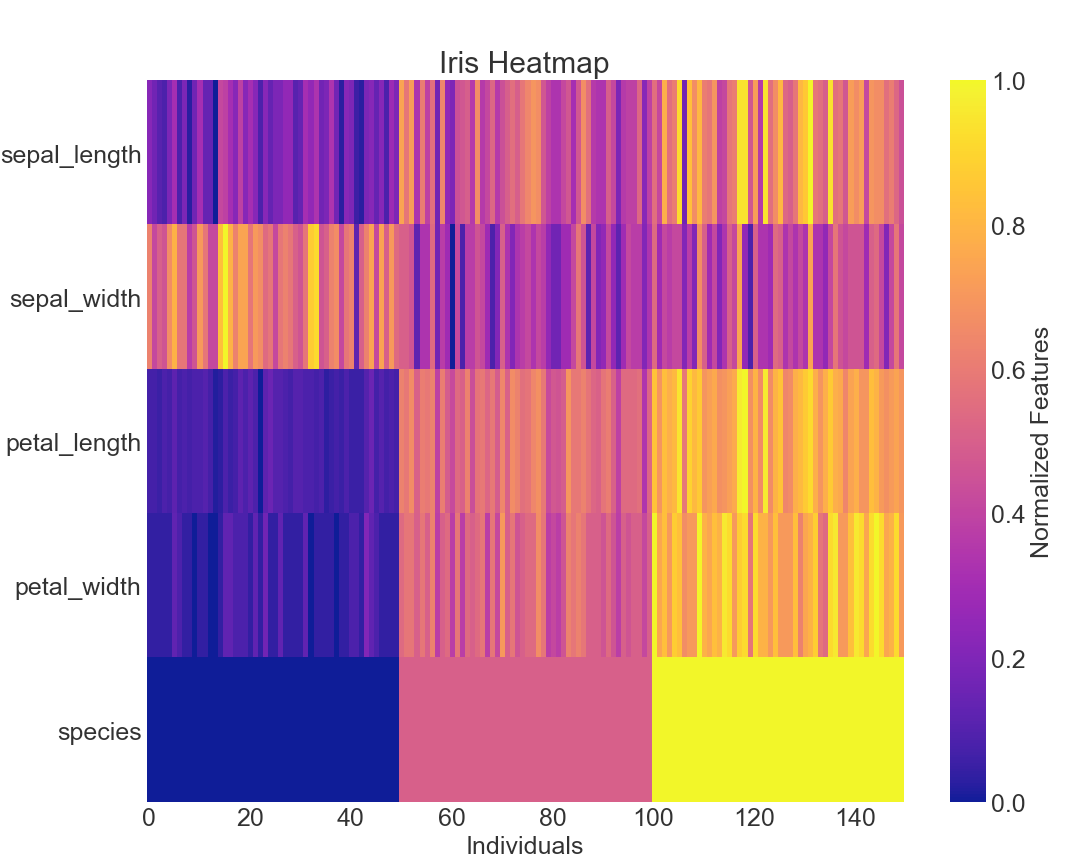

**Question 8:** Name at least one patterns in this heatmap that was difficult to see in the scatterplots?

**Question 9:** How does the order of the data in iris.csv support the readability of this heatmap? Explain your answer.

**Answer 8:** *

it lets me more clearly see the differences between the species categories and their different attributes and more clearly where the species attributes differed more than others for example species 0 has vert different sepal width compared to speciecs 1 and 2 also all the categories have very distinctive petal widths and lengths at similar ratios (since normalized individually) so it makes catorization based off of these samples based of of their species easier (these are good variables to use); sepal length could also be used however there is not as much variation between the specicies


**Answer 9:**

It helps the readability because all species are grouped together in order of the smallest species number to the highest and there is an even ammount of species so it lets the difference of the species over the variables be more easily seen in the different boxes of the heatmap


## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Explore additional visualizations

- Implement a scatter plot version that uses the marker size aesthetic to visualize another dimension of data (up to 4D).
- Implement a scatter plot version that uses both color and marker size aesthetics (up to 5D).

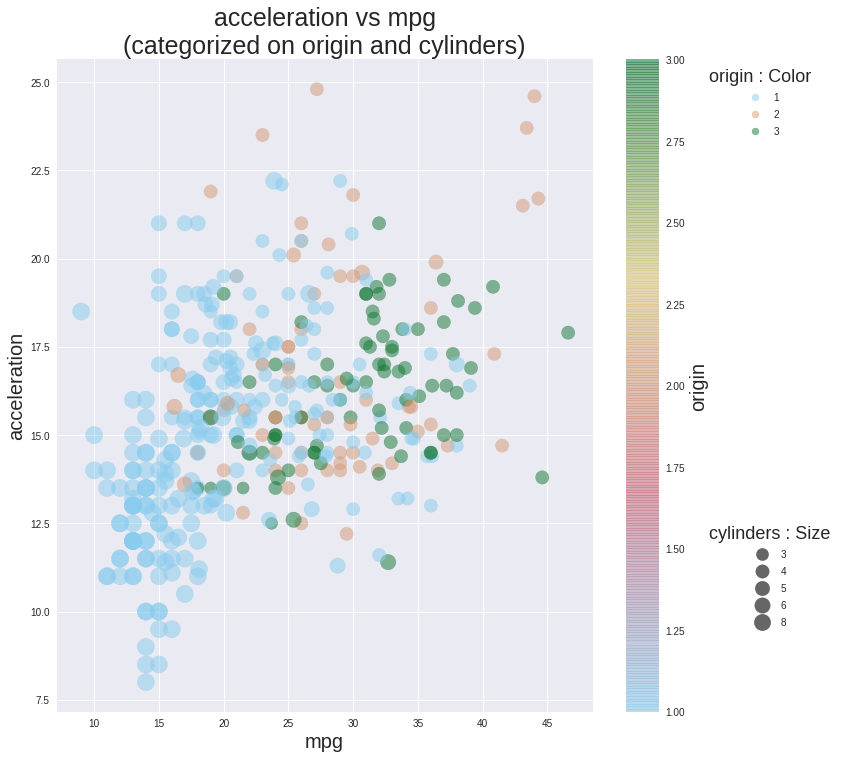

In [21]:
#showing the use of a size and color scatter plot with the use of mpg data
plt.rcParams.update({'font.size': 20, 'figure.figsize': (12, 12)})
auto_data = Data('auto-mpg.csv')
auto_transform = transformation.Transformation(auto_data)
auto_transform.scatter_color_size('mpg', 'acceleration', 'origin', 'cylinders')
auto_transform.show()

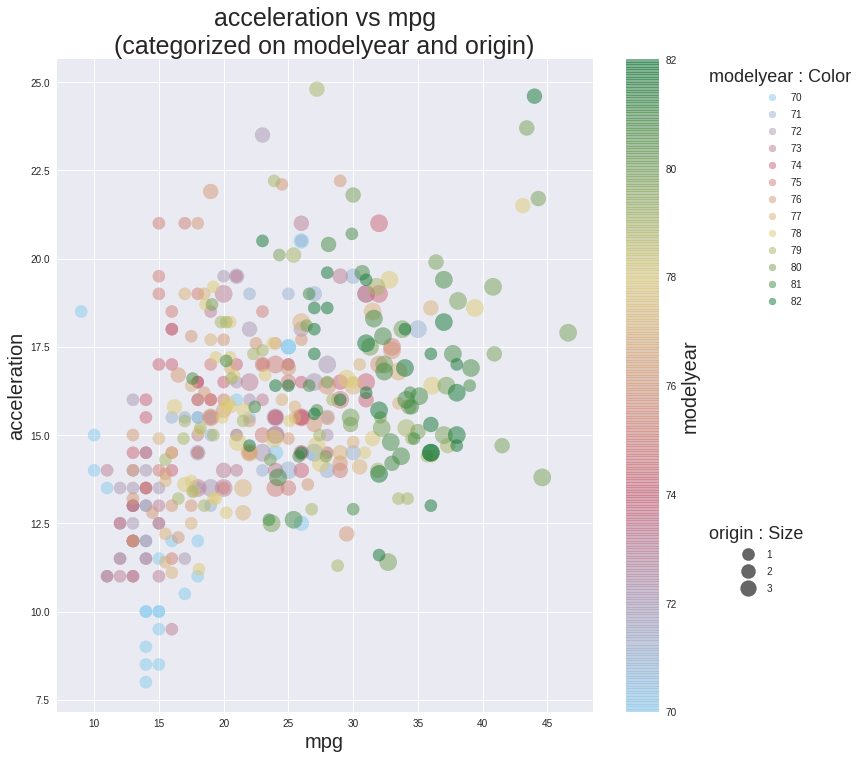

In [22]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (12, 12)})
auto_data = Data('auto-mpg.csv')
auto_transform = transformation.Transformation(auto_data)
auto_transform.scatter_color_size('mpg', 'acceleration', 'modelyear', 'origin')
auto_transform.show()

### 2. Perform different matrix transformations on data

- Normalize by Z-score rather than min/max.
- "Whiten" a dataset.
- Implement normalize together and separately using numpy vectorization/broadcasting. Compare the approaches in efficiency (time and compare the two implementations).

In [23]:
auto_data = Data('auto-mpg.csv')
auto_transform = transformation.Transformation(auto_data)
auto_transform.std(auto_data.get_headers())

array([  7.81598,   1.701  , 104.26984,  38.46966, 846.84177,   2.75769,
         3.69763,   0.80205])

In [24]:
auto_transform.normalize_separately_zscore()

array([[-0.70555,  1.49631,  1.08923, ..., -1.29387, -1.62538, -0.71425],
       [-1.08938,  1.49631,  1.50162, ..., -1.47518, -1.62538, -0.71425],
       [-0.70555,  1.49631,  1.19473, ..., -1.65649, -1.62538, -0.71425],
       ...,
       [ 1.08565, -0.85524, -0.56033, ..., -1.43892,  1.61994, -0.71425],
       [ 0.57388, -0.85524, -0.70419, ...,  1.09944,  1.61994, -0.71425],
       [ 0.95771, -0.85524, -0.71378, ...,  1.38954,  1.61994, -0.71425]])

In [25]:
#can see the data is whitten with all variables having a mean of 0 and std of 1
print(f"Means: {auto_transform.mean(auto_data.get_headers())}")
print(f"STDs: {auto_transform.std(auto_data.get_headers())}")

Means: [-0. -0. -0. -0. -0.  0. -0.  0.]
STDs: [1. 1. 1. 1. 1. 1. 1. 1.]


### 3. Implement and use 2D rotation

### 4. Apply matrix transformations and visualization a dataset of your choice

I was struggling to find a data set I wanted to analyze for this project but then after class today
I found the waffle-house divorce data-set we looked at in class to be funny and also require me to
look at the relationships of multiple variable because as we saw in classed there can be correlation
between 2 variables but that does not mean causation.
(also look at tylervigen.com/spurious-correlations)

This data sets headers are as follows :

Location : State name

Loc : State abbreviation

Population : 2010 population in millions

MedianAgeMarriage: 2005-2010 median age at marriage

Marriage : 2009 marriage rate per 1000 adults

Marriage.SE : Standard error of rate

Divorce : 2009 divorce rate per 1000 adults

Divorce.SE : Standard error of rate

WaffleHouses : Number of diners

South : 1 indicates Southern State

Slaves1860 : Number of slaves in 1860 census

Population1860 : Population from 1860 census

PropSlaves1860 : Proportion of total population that were slaves in 1860
(thank you to https://rdrr.io/github/rmcelreath/rethinking/man/WaffleDivorce.html for the data set with a few more variables)




To start out I had to import the requests library to download the data set from the url below

In [26]:
import requests
data_url = 'https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/WaffleDivorce.csv'
data_request = requests.get('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/WaffleDivorce.csv')
print(data_request.text)

Location;Loc;Population;MedianAgeMarriage;Marriage;Marriage SE;Divorce;Divorce SE;WaffleHouses;South;Slaves1860;Population1860;PropSlaves1860
Alabama;AL;4.78;25.3;20.2;1.27;12.7;0.79;128;1;435080;964201;0.45
Alaska;AK;0.71;25.2;26.0;2.93;12.5;2.05;0;0;0;0;0
Arizona;AZ;6.33;25.8;20.3;0.98;10.8;0.74;18;0;0;0;0
Arkansas;AR;2.92;24.3;26.4;1.70;13.5;1.22;41;1;111115;435450;0.26
California;CA;37.25;26.8;19.1;0.39;8.0;0.24;0;0;0;379994;0
Colorado;CO;5.03;25.7;23.5;1.24;11.6;0.94;11;0;0;34277;0
Connecticut;CT;3.57;27.6;17.1;1.06;6.7;0.77;0;0;0;460147;0
Delaware;DE;0.90;26.6;23.1;2.89;8.9;1.39;3;0;1798;112216;0.016
District of Columbia;DC;0.60;29.7;17.7;2.53;6.3;1.89;0;0;0;75080;0
Florida;FL;18.80;26.4;17.0;0.58;8.5;0.32;133;1;61745;140424;0.44
Georgia;GA;9.69;25.9;22.1;0.81;11.5;0.58;381;1;462198;1057286;0.44
Hawaii;HI;1.36;26.9;24.9;2.54;8.3;1.27;0;0;0;0;0
Idaho;ID;1.57;23.2;25.8;1.84;7.7;1.05;0;0;0;0;0
Illinois;IL;12.83;27.0;17.9;0.58;8.0;0.45;2;0;0;1711951;0
Indiana;IN;6.48;25.7;19.8;0.81;1

As you can see there are a few problems with how this data is formatted right now versus how data needs to be when it is loaded into the Data object that I have created. First off it is in a string format right now (all one long string), there are no data type headers and there is data containing strings (but this is of no worry to me because each sample is a different state I am going to hold the names of the states in an array whos indexs will corespond to the row (sample) of data in the Data object)

Now I am going to set up the data to be written into a csv file named WH_divorce.csv and write it in

In [27]:
data_string_list = data_request.text.splitlines()
data_string_list.insert(1,'string;string;numeric;numeric;numeric;numeric;'
                        'numeric;numeric;numeric;numeric;numeric;numeric;numeric')

data_parsed = [line.split(';') for line in data_string_list]

with open('WH_divorce.csv','w') as WH_divorce_csv:
    csv_writer = csv.writer(WH_divorce_csv)
    csv_writer.writerows(data_parsed)

Here I am saving the list of states and loading the data object in and making the transformation object

In [28]:
states_list = []
for line in data_parsed[2:]:
    states_list.append(line[0])
print(states_list)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [29]:
wh_data = Data('WH_divorce.csv')

In [30]:
print(wh_data)


-------------------------------
WH_divorce.csv (50x11)
Headers:
	Population	MedianAgeMarriage	Marriage	MarriageSE	Divorce	DivorceSE	WaffleHouses	South	Slaves1860	Population1860	PropSlaves1860
-------------------------------
 Showing first 5/50 rows.
4.78	25.3	20.2	1.27	12.7	0.79	128.0	 1.0	435080.0	964201.0	0.45
0.71	25.2	26.0	2.93	12.5	2.05	 0.0	 0.0	 0.0	 0.0	 0.0
6.33	25.8	20.3	0.98	10.8	0.74	18.0	 0.0	 0.0	 0.0	 0.0
2.92	24.3	26.4	 1.7	13.5	1.22	41.0	 1.0	111115.0	435450.0	0.26
37.25	26.8	19.1	0.39	 8.0	0.24	 0.0	 0.0	 0.0	379994.0	 0.0


As you can see due to the amount of variable it makes just printing out the data a little hard to read so I am going to just print out the headers and then show a pair plot of all the numeric data to see if there are any obvious relationships or categorical variables (enums)

In [31]:
print(f'Data Variables [Headers]: \n{wh_data.get_headers()}')

Data Variables [Headers]: 
['Population', 'MedianAgeMarriage', 'Marriage', 'MarriageSE', 'Divorce', 'DivorceSE', 'WaffleHouses', 'South', 'Slaves1860', 'Population1860', 'PropSlaves1860']


In [32]:
wh_transform = transformation.Transformation(wh_data)

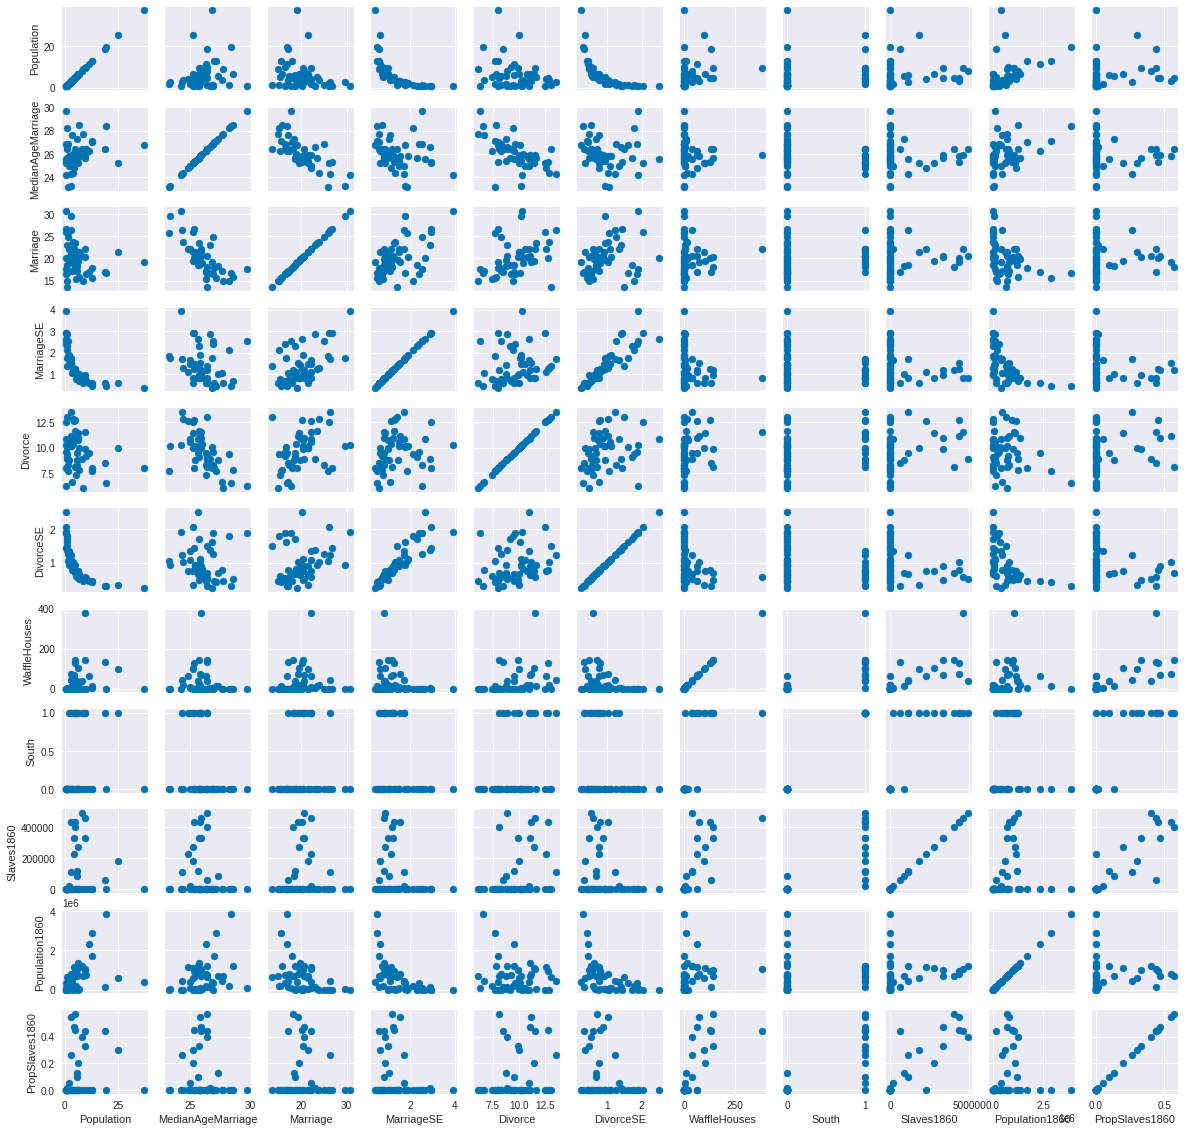

In [33]:
#do a pair plot with all the headers of the wh_data use fig_size =
wh_transform.pair_plot(wh_data.get_headers(),fig_sz=(20,20))
wh_transform.show()

From this intitial pair_plots there are a few observations I can make. First off is that the only
categorical variable is weather the state is in the south or not which makes sense (I also could have seen this by just looking at the data better in a csv viewer and mentioned before but this is confirmed by seeing how the data is in rows/ columns on the plot when in the pair plot with all the variables). I also am first going to look at the data from present times (that is all columns minus the last 3, ie the ones about 1860) and also use south as a categorical color variable. So this means that I have to use AllData the data class I created that extends the Data class. Also making diagnoals histograms.

In [34]:
Allwh_data = AllData('WH_divorce.csv')
Allwh_transform = transformation.Transformation(Allwh_data)
print(Allwh_data.get_headers())

['Location', 'Loc', 'Population', 'MedianAgeMarriage', 'Marriage', 'MarriageSE', 'Divorce', 'DivorceSE', 'WaffleHouses', 'South', 'Slaves1860', 'Population1860', 'PropSlaves1860']


I am also going to do a pair plot without the marriage standard error and divorce se also
going to hold these headers in a list to be used again and I am also just using Median age of marrige for marrige varible.

In [35]:
pres_data_headers_not_se = Allwh_transform

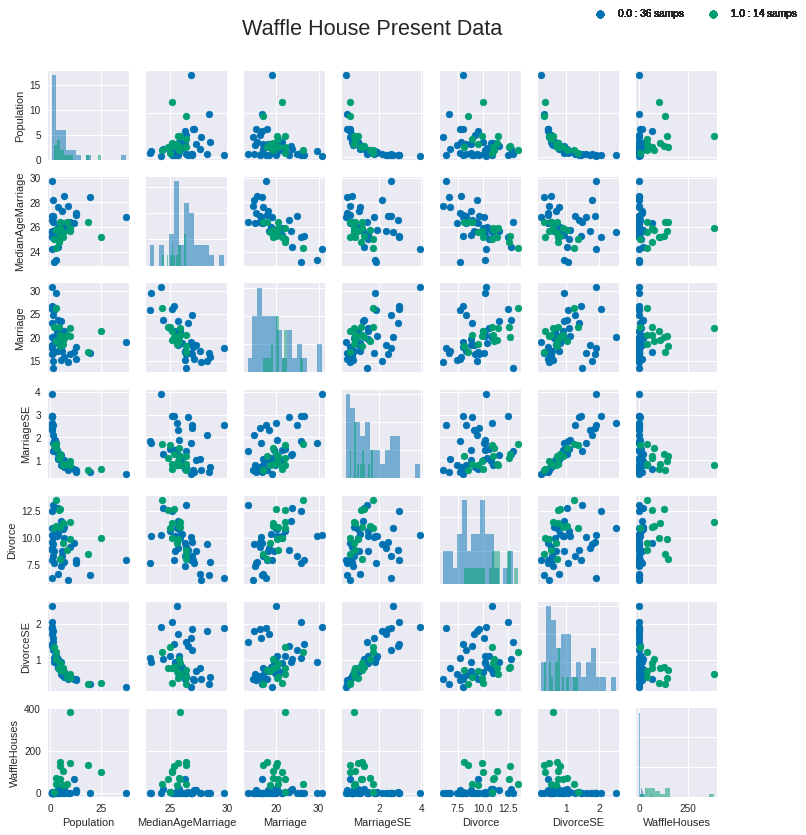

In [36]:
Allwh_transform.pair_plot(Allwh_data.get_headers()[2:9],title = 'Waffle House Present Data',
                         cat = Allwh_data.get_headers()[9], diag = 'hist')
Allwh_transform.show()

From this pair plot it is clear that the reason there seems to be more diovorces in states with more waffle houses is because when lookin at the pair plot it can be seen that there are more waffle houses in the south than the north and that this is why the divorce rate appears higher because also when looking at the scatter plot with the states categorized by color absed off of if they are in the south or not is that the average age of marrige in souther states is lower than the avererage age in northern states and then also from the pair pliot it can be see that a lower average age of marige posivly correlates with a high divorce rate (looks like a neg corelation when marriage age is on y axis and divorce on x) and this makes sense as to the real reason divorce rates are higher because people who get married at a younger age are more likly to be divorced

5. Not really an extension related to Data science, but I thought it was cool
I am modify code that I found from here https://en.wikipedia.org/wiki/Barnsley_fern
but really I am using it to explore my understanding of fractals and seeing how I can manipulate them.

According to the wiki article  "The fern is one of the basic examples of self-similar sets, i.e. it is a mathematically generated pattern that can be reproducible at any magnification or reduction."

This fern fractal is based on https://en.wikipedia.org/wiki/Affine_transformation

I am making a fractal projection on a plot to look like the fern

first make the different function for the fern based off of
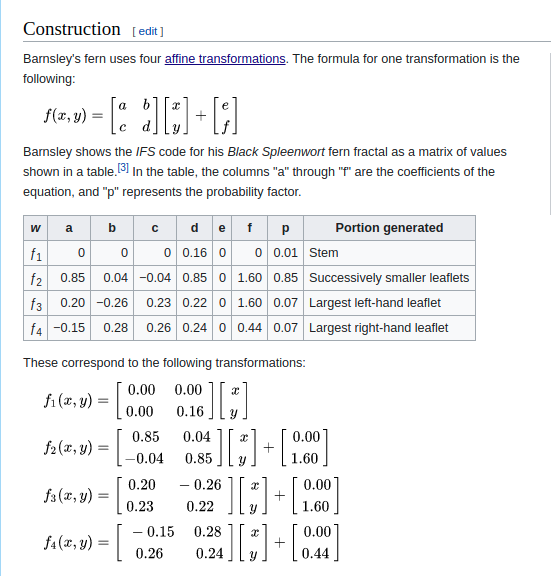

In [39]:


#stem function
def f1(xy_pair):
    mult_matrix = np.array([[0.00,0.00],[0.00,0.16]])
    xy_pair = mult_matrix@xy_pair
    return xy_pair

#successivly smaller leaflet function
def f2(xy_pair):
    mult_matrix = np.array([[0.85,0.04],[-0.04,0.85]])
    add_matrix = np.array([0.00,1.60])
    xy_pair = (mult_matrix@xy_pair) + add_matrix
    return xy_pair


#largest left-handed leaf
def f3(xy_pair):
    mult_matrix = np.array([[0.20,-0.26],[0.23,0.22]])
    add_matrix = np.array([0.00,1.60])
    xy_pair = (mult_matrix@xy_pair) + add_matrix
    return xy_pair


#largest right-handed leaf
def f4(xy_pair):
    mult_matrix = np.array([[-0.25,0.28],[0.26,0.24]])
    add_matrix = np.array([0.00,0.44])
    xy_pair = (mult_matrix@xy_pair) + add_matrix
    return xy_pair

#list to hold functions to randomply choose from
fern_functions = [f1,f2,f3,f4] 
probs = [0.01,0.85,0.07,0.07]


#main function to run along xy row axis will randomly pick 1 of the 4 helper 
# functions above based on the probability



#why cant I do this with recursion depth

def fern_function_rec(x, y, x_list = [], y_list = [], point_amt = 1000):
    
    func = np.random.choice(fern_functions, p = [0.01,0.85,0.07,0.07])
    
    xy_pair = np.array([x,y])
    xy_pair = func(xy_pair)
    x = xy_pair[0]
    y = xy_pair[1]
    x_list.append(x)
    y_list.append(y)
    
    if len(x_list) == point_amt:
        return x_list, y_list
    
    else:
        fern_function_rec(x,y, x_list, y_list, point_amt)

        
        

    
    
def fern_function(x, y, x_list = [], y_list = [], point_amt = 100000):
    
    
    
    for point in range(point_amt):
        func = np.random.choice(fern_functions, p = [0.01,0.85,0.07,0.07])
        xy_pair = np.array([x,y])
        xy_pair = func(xy_pair)
        x = xy_pair[0]
        y = xy_pair[1]
        #print(f'X :{x}  Y: {y}  Func: {func}')
        x_list.append(x)
        y_list.append(y)
    
    return x_list, y_list
    
    

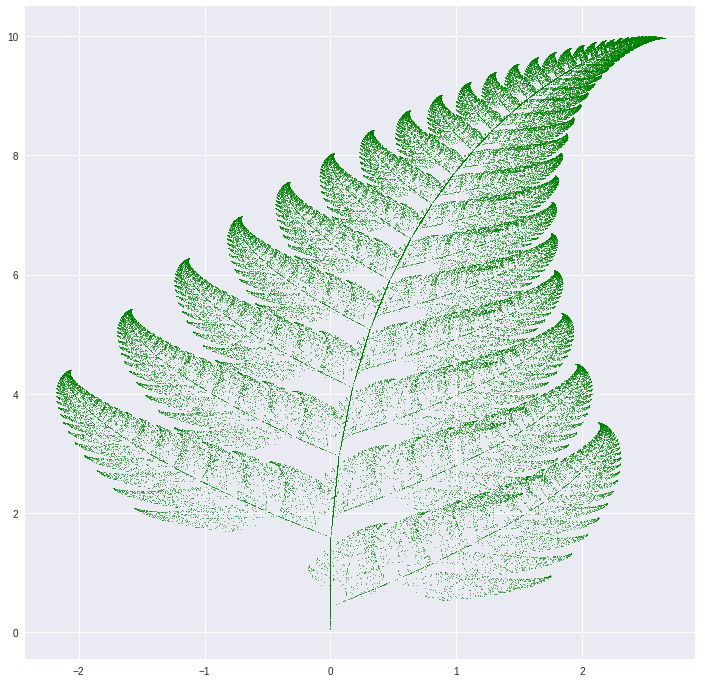

In [40]:
#set up numbers 
x = 0
y = 0


#set random seed so same function is not chosen every time
np.random.seed(1)

final_x , final_y = fern_function(x,y)


plt.scatter(final_x,final_y, s = .25, color = 'g')